<a href="https://colab.research.google.com/github/KoushaAm/Network_Traffic_Anamoly_Detection/blob/main/Network_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network Anamoly Detection with K-means

dataset: https://www.kaggle.com/datasets/anushonkar/network-anamoly-detection/data

In [1]:
import kagglehub
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("anushonkar/network-anamoly-detection")
shutil.move(path, "/content/")

# reading the dataset
train_df = pd.read_csv("/content/1/Train.txt")
test_df = pd.read_csv("/content/1/Test.txt")

100%|██████████| 2.88M/2.88M [00:00<00:00, 52.9MB/s]

Extracting files...


In [2]:
# adding a column for readability
columns_names = ["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"]

train_df.columns = columns_names
test_df.columns = columns_names

train_df.head()
test_df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [3]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125972 non-null  int64  
 1   protocoltype            125972 non-null  object 
 2   service                 125972 non-null  object 
 3   flag                    125972 non-null  object 
 4   srcbytes                125972 non-null  int64  
 5   dstbytes                125972 non-null  int64  
 6   land                    125972 non-null  int64  
 7   wrongfragment           125972 non-null  int64  
 8   urgent                  125972 non-null  int64  
 9   hot                     125972 non-null  int64  
 10  numfailedlogins         125972 non-null  int64  
 11  loggedin                125972 non-null  int64  
 12  numcompromised          125972 non-null  int64  
 13  rootshell               125972 non-null  int64  
 14  suattempted         

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['protocoltype']=le.fit_transform(train_df['protocoltype'])
train_df['service']=le.fit_transform(train_df['service'])
train_df['flag']=le.fit_transform(train_df['flag'])
train_df['attack']=le.fit_transform(train_df['attack'])

test_df['protocoltype']=le.fit_transform(test_df['protocoltype'])
test_df['service']=le.fit_transform(test_df['service'])
test_df['flag']=le.fit_transform(test_df['flag'])
test_df['attack']=le.fit_transform(test_df['attack'])

In [59]:
def euclidean(point, data):
    # Euclidean distance between point - data.
    return np.sqrt(np.sum((point - data)**2, axis=1))

class Kmeans:
    def __init__(self, n_clusters, max_iter=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.labels_ = None
        self.random_state = random_state


    def fit(self, data):
        np.random.seed(self.random_state)

        # creating centroids randomly from the data
        n_samples = data.shape[0]
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = data[random_indices]

        for i in range(self.max_iter):
            # assigning clusters based on the nearest centroid
            distances = np.array([euclidean(data, centroid) for centroid in self.centroids]).T
            self.labels_ = np.argmin(distances, axis=1)

            new_centroids = []
            for k in range(self.n_clusters):
                # creating a new centroid
                cluster_points = data[np.where(self.labels_ == k)]
                if len(cluster_points) > 0:
                    new_centroid = np.mean(cluster_points, axis=0)
                else:
                    new_centroid = self.centroids[k]
                new_centroids.append(new_centroid)

            new_centroids = np.array(new_centroids)
            if np.allclose(self.centroids, new_centroids):  # converged, no more clustering required !!!
                break
            self.centroids = new_centroids

    def predict(self, data):
      # choosing the closest cluster by comparing
      # the euclidean distance to the centroid of the cluster
      data = np.asarray(data)
      distances = np.array([np.linalg.norm(data - centroid, axis=1) for centroid in self.centroids]).T
      return np.argmin(distances, axis=1)


# silhouette method to determine the optimal number of clusters
def silhouette(data, labels):
  n_samples = data.shape[0]
  unique_labels = np.unique(labels)
  n_clusters = len(unique_labels)
  silhouette_scores = []

  for i in range(n_samples):
    own_cluster = labels[i]
    in_cluster_points = data[labels == own_cluster]
    out_cluster_points = data[labels != own_cluster]

    a = np.mean(euclidean(data[i], in_cluster_points)) if len(in_cluster_points) > 1 else 0
    b = np.min([
        np.mean(euclidean(data[i], data[labels == label]))
        for label in unique_labels if label != own_cluster
    ]) if len(unique_labels) > 1 else 0

    silhouette_scores.append((b - a) / max(a, b) if max(a, b) > 0 else 0)

  return np.mean(silhouette_scores)

In [ ]:
# determining the best number of clusters
n_clusters_range = range(2, 30)
silhouette_scores = []

for n_clusters in n_clusters_range:
  kmeans = Kmeans(n_clusters=n_clusters)
  kmeans.fit(train_df[:5000].values)
  silhouette_scores.append(silhouette(train_df[:5000].values, kmeans.labels_))
  print(f"Silhouette score for {n_clusters} clusters: {silhouette_scores[-1]}")

Silhouette score for 2 clusters: 0.9999395105383763
Silhouette score for 3 clusters: 0.9970366613777912
Silhouette score for 4 clusters: 0.8617077758049579
Silhouette score for 5 clusters: 0.871990613500481
Silhouette score for 6 clusters: 0.8987306497014294
Silhouette score for 7 clusters: 0.9014669667156521
Silhouette score for 8 clusters: 0.8833762182001529
Silhouette score for 9 clusters: 0.8181163950404191
Silhouette score for 10 clusters: 0.8263384388141236
Silhouette score for 11 clusters: 0.8455282280194079
Silhouette score for 12 clusters: 0.7384529112600616
Silhouette score for 13 clusters: 0.7389433897678491
Silhouette score for 14 clusters: 0.5918625758398157
Silhouette score for 15 clusters: 0.7135739534481488
Silhouette score for 16 clusters: 0.6215304067295059
Silhouette score for 17 clusters: 0.6453803736075061
Silhouette score for 18 clusters: 0.6471723400845459
Silhouette score for 19 clusters: 0.6541386253338567
Silhouette score for 20 clusters: 0.6439292845372296
Si

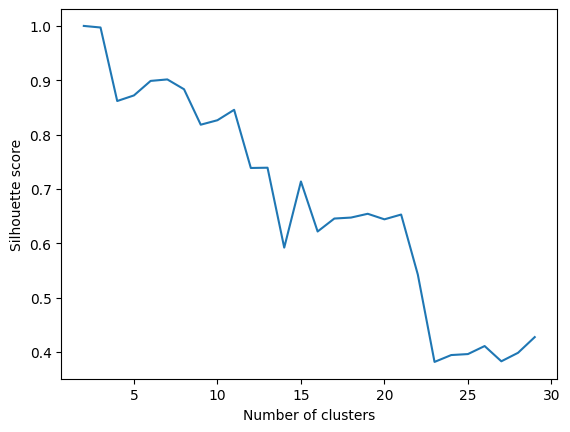

In [ ]:
#plotting the scores
plt.plot(n_clusters_range, silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

"""
based on the plot the optimal score would be at 0.9 which indicates 5-7 clusters
"""

In [60]:
model = Kmeans(n_clusters=5, max_iter=100, random_state=111)

model.fit(train_df.values)

cluster_labels = model.labels_
centroids = model.centroids

print(f"Cluster Labels:\n{cluster_labels}")
print(f"Cluster Centroids:\n{centroids}")



Cluster Labels:
[4 4 4 ... 4 4 4]
Cluster Centroids:
[[3.53245000e+04 1.00000000e+00 3.40000000e+01 3.00000000e+00
  1.27374169e+09 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 7.85000000e+01
  1.00000000e+00 1.00000000e-02 1.20000000e-01 8.00000000e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 8.00000000e-02
  1.00000000e+00 1.50000000e+01 1.15000000e+01]
 [2.46476667e+04 1.00000000e+00 2.93333333e+01 2.66666667e+00
  5.65551131e+08 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.33333333e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00

In [62]:
pd.Series(model.labels_).value_counts()

,count
4,125962
1,3
3,3
0,2
2,2


In [64]:
# unique cluster_labels
unique_labels = np.unique(cluster_labels)
print(f"Unique Cluster Labels: {unique_labels}")

Unique Cluster Labels: [0 1 2 3 4]


In [54]:
test_df['attack'].unique() # these are clustered in 5

array([14, 16, 24, 11,  4, 27,  0, 25,  2,  1, 33, 28, 21, 19,  5, 15, 22,
       29,  7, 10, 20, 12, 13, 26,  9, 37, 34, 31, 23, 35, 17,  8, 36, 30,
        3,  6, 32, 18])

In [68]:
model_labels = model.labels_
centroids = model.centroids

centroids_diff = np.diff(centroids)
feature_importance = np.abs(centroids_diff)

# calculating average importance across clusters
avg_importance = np.mean(feature_importance, axis=0)
sorted_indices = np.argsort(avg_importance)[::-1]

In [70]:
column_names = train_df.columns

# column names of respective features in descending order of importance
sorted_column_names = column_names[sorted_indices]

# feature importance scores in descending order of importance
sorted_importance_scores = avg_importance[sorted_indices]

for col_name, importance_score in zip(sorted_column_names, sorted_importance_scores):
    print(f"Feature: {col_name}, Importance: {importance_score}")

Feature: srcbytes, Importance: 538544180.995043
Feature: flag, Importance: 398546335.8324278
Feature: dstbytes, Importance: 141404760.5667249
Feature: duration, Importance: 22149.51864953981
Feature: srvdiffhostrate, Importance: 163.64395891882737
Feature: dsthostcount, Importance: 123.36445488851135
Feature: dsthostsrvcount, Importance: 40.10671431595772
Feature: protocoltype, Importance: 32.86793900806063
Feature: service, Importance: 29.349200552547593
Feature: isguestlogin, Importance: 21.42098569409822
Feature: count, Importance: 14.874832092218288
Feature: dsthostsrvrerrorrate, Importance: 13.177993728267253
Feature: srvcount, Importance: 6.438471009775435
Feature: attack, Importance: 4.409243528471549
Feature: samesrvrate, Importance: 0.8302367751120622
Feature: srvserrorrate, Importance: 0.6351868552949835
Feature: dsthostrerrorrate, Importance: 0.30360960713019225
Feature: dsthostsamesrvrate, Importance: 0.3030011379093126
Feature: dsthostsrvserrorrate, Importance: 0.290937759

In [79]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# top features:
"""
Feature: srcbytes, Importance: 538544180.995043
Feature: flag, Importance: 398546335.8324278
Feature: dstbytes, Importance: 141404760.5667249
Feature: duration, Importance: 22149.51864953981
"""

selected_features = ['srcbytes', 'flag', 'dstbytes', 'duration']
feature_index = [train_df.columns.get_loc(col) for col in selected_features]

X_selected = train_df.iloc[:, feature_index].values

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_selected)

centroids_selected = centroids[:, feature_index]
distances = cdist(X_normalized, centroids_selected, metric='euclidean')

min_distances = np.min(distances, axis=1)
threshold = np.percentile(min_distances, 95)

anomaly_indices = np.where(min_distances > threshold)[0]

anomalies = min_distances > threshold
anomaly_indices = np.where(anomalies)[0]

# anomalies
print("Anomalous points indecies:", anomaly_indices)


#showing the anamolies in table
anomaly_df = train_df.iloc[anomaly_indices]
anomaly_df

Anomalous points indecies: [  3767  11119  15955  17747  24142  28723  29088  32847  35008  37252
  37257  38431  39029  47801  52747  56836  61788  63263  63777  63798
  63930  64653  69646  69737  77937  82908  88783  91260  91387  93178
  94225  95262  98290  98455 100135 101202 104488 106202 106513 109005
 113903 116784]


,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
3767,0,1,49,0,0,0,0,0,0,0,...,0.01,0.74,0.74,0.00,0.03,0.00,0.63,0.0,15,12
11119,0,1,54,0,0,0,0,0,0,0,...,0.23,0.36,0.34,0.02,0.08,0.03,0.32,0.0,15,1
15955,0,1,24,0,0,0,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.00,0.00,0.0,11,20
17747,0,1,49,0,0,0,0,0,0,0,...,0.01,0.74,0.74,0.00,0.03,0.00,0.63,0.0,15,12
24142,0,1,67,0,0,0,0,0,0,0,...,0.01,0.70,0.70,0.00,0.04,0.00,0.63,0.0,15,9
28723,0,1,49,0,0,0,0,0,0,0,...,0.01,0.76,0.76,0.00,0.03,0.00,0.63,0.0,15,12
29088,0,1,49,0,0,0,0,0,0,0,...,0.00,0.77,0.77,0.00,0.03,0.00,0.63,0.0,15,12
32847,0,1,49,0,0,0,0,0,0,0,...,0.01,0.68,0.68,0.00,0.04,0.00,0.64,0.0,15,11
35008,0,1,49,0,0,0,0,0,0,0,...,0.01,0.71,0.71,0.00,0.04,0.00,0.62,0.0,15,11
37252,0,1,49,0,0,0,0,0,0,0,...,0.00,0.27,0.25,0.00,0.00,0.00,0.25,0.0,15,11
